In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
pwd

'C:\\Users\\Pere Lopez\\AnacondaProjects\\Tensorflow pruebas'

In [19]:
leche = pd.read_csv('C:\\Users\\Pere Lopez\\AnacondaProjects\\Tensorflow pruebas\\produccion-leche.csv',index_col='Month')

In [20]:
leche

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


In [21]:
leche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Milk Production  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6+ KB


In [22]:
leche.index = pd.to_datetime(leche.index) #afegim un index de datetime

<AxesSubplot:xlabel='Month'>

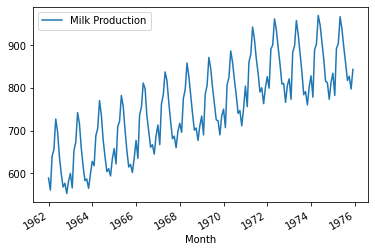

In [23]:
leche.plot()

In [24]:
conjunto_entrenamiento = leche.head(150)
conjunto_pruebas = leche.head(18)

In [25]:
from sklearn.preprocessing import MinMaxScaler #normalitzem dades

In [26]:
normalizacion = MinMaxScaler()
entrenamiento_normalizado = normalizacion.fit_transform(conjunto_entrenamiento)
pruebas_normalizado = normalizacion.transform(conjunto_pruebas)

In [27]:
entrenamiento_normalizado

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [28]:
def lotes(datos_entrenamiento, tamaño_lote, pasos):
    comienzo = np.random.randint(0,len(datos_entrenamiento)-pasos)
    lote_y = np.array(datos_entrenamiento[comienzo:comienzo+pasos+1]).reshape(1,pasos+1)
    return lote_y[:,:-1].reshape(-1,pasos,1), lote_y[:,1:].reshape(-1,pasos,1)

In [29]:
numero_entradas = 1
numero_pasos = 18
numero_neuronas = 120
numero_salidas = 1
tasa_aprendizaje = 0.001
numero_iteraciones_entrenamiento = 5000
tamaño_lote = 1

In [30]:
x = tf.placeholder(tf.float32, (None, numero_pasos, numero_entradas))
y = tf.placeholder(tf.float32, (None, numero_pasos, numero_salidas))

In [31]:
capa = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_units=numero_neuronas, activation=tf.nn.relu), output_size=numero_salidas)

In [32]:
salidas, estados = tf.nn.dynamic_rnn(capa,x,dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
funcion_error = tf.reduce_mean(tf.square(salidas-y))
optimizador = tf.train.AdamOptimizer(learning_rate=tasa_aprendizaje)
entrenamiento = optimizador.minimize(funcion_error)

In [35]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [65]:
with tf.Session() as sesion:
    sesion.run(init)
    for iteracion in range(numero_iteraciones_entrenamiento):
        lote_x, lote_y = lotes(entrenamiento_normalizado, tamaño_lote, numero_pasos)
        sesion.run(entrenamiento, feed_dict = {x:lote_x, y:lote_y})
        if iteracion %100 == 0:
            error = funcion_error.eval(feed_dict={x:lote_x, y:lote_y})
            print(iteracion, '\t error', error)
    saver.save(sesion, './modelos_series_temporales')

0 	 error 0.32696512
100 	 error 0.032794636
200 	 error 0.03655386
300 	 error 0.011177487
400 	 error 0.012892382
500 	 error 0.007907639
600 	 error 0.014253046
700 	 error 0.009664421
800 	 error 0.008899503
900 	 error 0.0075450707
1000 	 error 0.006218134
1100 	 error 0.0057006637
1200 	 error 0.0040482683
1300 	 error 0.006074286
1400 	 error 0.005571609
1500 	 error 0.0048081405
1600 	 error 0.005702237
1700 	 error 0.0054633496
1800 	 error 0.0043254863
1900 	 error 0.005033793
2000 	 error 0.004675403
2100 	 error 0.003447346
2200 	 error 0.003625746
2300 	 error 0.007419317
2400 	 error 0.005500261
2500 	 error 0.006887095
2600 	 error 0.0045487415
2700 	 error 0.0035648453
2800 	 error 0.009653437
2900 	 error 0.004823559
3000 	 error 0.0075221127
3100 	 error 0.0058080675
3200 	 error 0.0060847006
3300 	 error 0.0049115145
3400 	 error 0.003719737
3500 	 error 0.0042572906
3600 	 error 0.0033168208
3700 	 error 0.0018119056
3800 	 error 0.003538147
3900 	 error 0.003450438

In [66]:
conjunto_pruebas

,Milk Production,Predicciones
Month,,
1962-01-01 01:00:00,589.0,598.255127
1962-02-01 01:00:00,561.0,594.173584
1962-03-01 01:00:00,640.0,589.926575
1962-04-01 01:00:00,656.0,586.120728
1962-05-01 01:00:00,727.0,582.783630
1962-06-01 01:00:00,697.0,579.930359
1962-07-01 01:00:00,640.0,577.513855
1962-08-01 01:00:00,599.0,575.495300
1962-09-01 01:00:00,568.0,573.821045


In [78]:
with tf.Session() as sesion:
    saver.restore(sesion, './modelos_series_temporales')
    entrenamiento_seed = list(entrenamiento_normalizado[-18:])
    for iteracion in range(18):
        lote_x = np.array(entrenamiento_seed[-numero_pasos:]).reshape(1,numero_pasos,1)
        prediccion_y = sesion.run(salidas, feed_dict={x:lote_x})
        entrenamiento_seed.append(prediccion_y[0,-1,0])

INFO:tensorflow:Restoring parameters from ./modelos_series_temporales


C:\Users\Pere Lopez\.conda\envs\datascience\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [84]:
resultados = normalizacion.inverse_transform(np.array(entrenamiento_seed[18:]).reshape(18,1))

In [85]:
resultados

array([[901.5218 ],
       [859.54596],
       [812.36224],
       [807.5834 ],
       [777.6737 ],
       [797.8848 ],
       [824.57666],
       [776.8014 ],
       [889.98865],
       [894.1401 ],
       [971.93286],
       [934.18506],
       [899.12915],
       [856.6968 ],
       [813.2784 ],
       [811.75   ],
       [784.9032 ],
       [807.10986]], dtype=float32)

In [86]:
conjunto_pruebas['Predicciones'] = resultados

C:\Users\Pere Lopez\.conda\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
conjunto_pruebas

,Milk Production,Predicciones
Month,,
1962-01-01 01:00:00,589.0,901.521790
1962-02-01 01:00:00,561.0,859.545959
1962-03-01 01:00:00,640.0,812.362244
1962-04-01 01:00:00,656.0,807.583374
1962-05-01 01:00:00,727.0,777.673706
1962-06-01 01:00:00,697.0,797.884827
1962-07-01 01:00:00,640.0,824.576660
1962-08-01 01:00:00,599.0,776.801392
1962-09-01 01:00:00,568.0,889.988647


<AxesSubplot:xlabel='Month'>

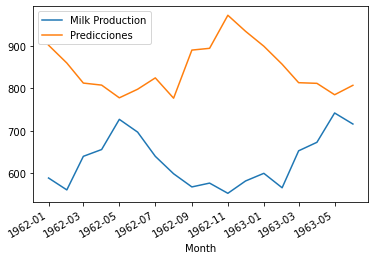

In [83]:
conjunto_pruebas.plot()